<a href="https://colab.research.google.com/github/vm291200/SLR/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import glob
from matplotlib import pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Mini proj/Asl_dataset'


In [ ]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    seed=123,
    label_mode = 'categorical',
    subset="training")

Found 2535 files belonging to 36 classes.
Using 2028 files for training.


In [ ]:
train_size = int(0.8 * len(data))
val_size = int(0.2 * len(data)) + 1
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    seed=123,
    label_mode = 'categorical',
    subset="validation")
# test_labels = test_data.classes

Found 2535 files belonging to 36 classes.
Using 507 files for validation.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# print(test_data[0])
# batch_list = [batch.tolist() for batch in test_data.as_numpy_iterator()]
for batch in test_data:
    # iterate over the elements within each batch
    for element in batch:
        print(element.numpy()[0][0][1])
        break
    break

[0. 0. 0.]


In [ ]:
# import os
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(36, activation = 'softmax')
])
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = cnn_model.fit(train_data, epochs=10,
                    validation_data=val_data,
                    )

Epoch 1/10
25/25 [==============================] - 15s 543ms/step - loss: 3.0798 - accuracy: 0.2138 - val_loss: 2.0481 - val_accuracy: 0.5421
Epoch 2/10
25/25 [==============================] - 13s 523ms/step - loss: 1.5971 - accuracy: 0.6350 - val_loss: 1.1941 - val_accuracy: 0.8178
Epoch 3/10
25/25 [==============================] - 13s 521ms/step - loss: 0.9458 - accuracy: 0.8138 - val_loss: 0.7959 - val_accuracy: 0.8598
Epoch 4/10
25/25 [==============================] - 12s 452ms/step - loss: 0.7254 - accuracy: 0.8575 - val_loss: 0.6478 - val_accuracy: 0.9112
Epoch 5/10
25/25 [==============================] - 13s 527ms/step - loss: 0.5453 - accuracy: 0.9100 - val_loss: 0.5413 - val_accuracy: 0.9206
Epoch 6/10
25/25 [==============================] - 13s 505ms/step - loss: 0.4278 - accuracy: 0.9325 - val_loss: 0.4298 - val_accuracy: 0.9112
Epoch 7/10
25/25 [==============================] - 13s 522ms/step - loss: 0.3253 - accuracy: 0.9525 - val_loss: 0.3731 - val_accuracy: 0.9206

In [ ]:
import numpy as np

# Get the predicted values for the test set
test_labels = []
test_predictions = []

for images, labels in test_data:
    # Get the model's predictions for the batch of images
    batch_predictions = cnn_model.predict(images)

    # Convert the predictions to labels
    batch_labels = np.argmax(batch_predictions, axis=1)
    # print(labels)

    # Append the batch labels and predictions to the respective lists
    test_labels.extend(labels.numpy())
    test_predictions.extend(batch_labels.tolist())

# Convert the lists to numpy arrays
test_labels = np.array(test_labels)
print(len(test_labels))
test_predictions = np.array(test_predictions)


1/1 [==============================] - 0s 259ms/step
507


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


16/16 [==============================] - 2s 97ms/step


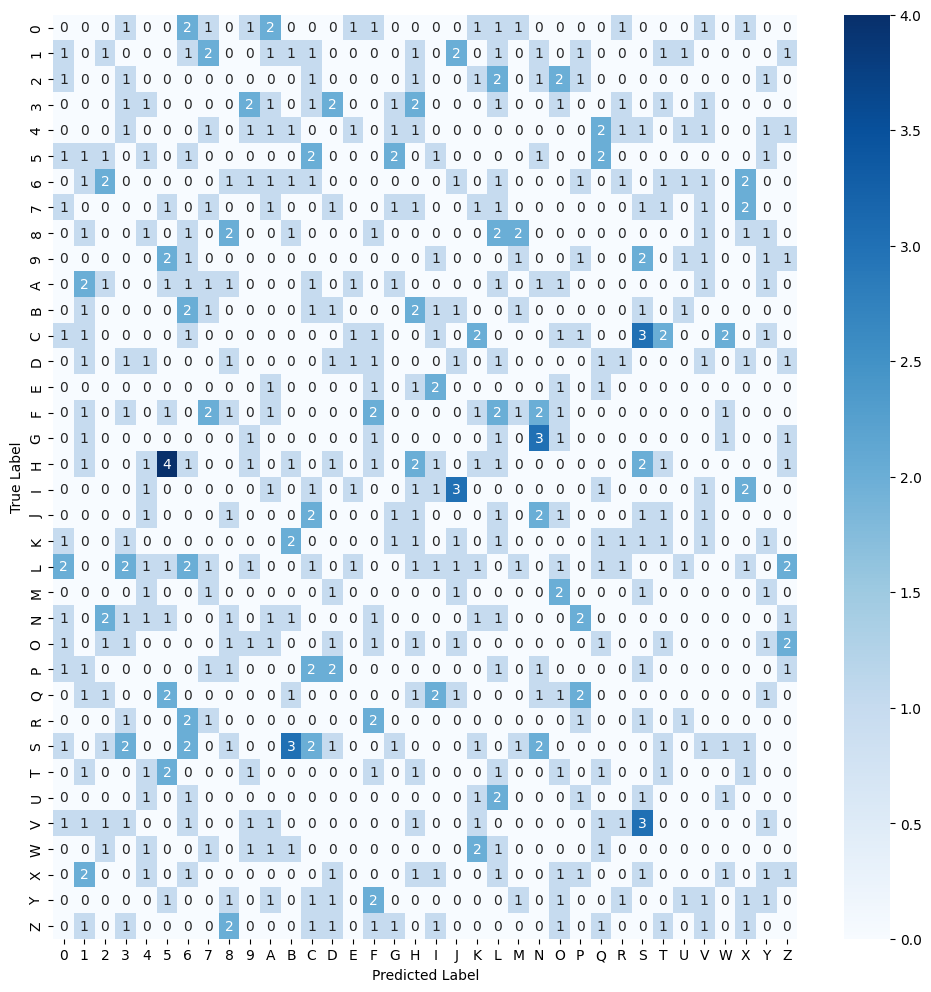

In [ ]:

# Get the predicted labels
test_pred = cnn_model.predict(test_data)
test_pred_classes = np.argmax(test_pred, axis=1)

# Get the true labels
test_true_classes = np.argmax(test_labels, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_pred_classes)
class_names = ['0','1','2','3','4','5','6','7','8','9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',]
# Plot the confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xticks(np.arange(36) + 0.5, labels=class_names)
plt.yticks(np.arange(36) + 0.5, labels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
val_labels = np.concatenate([y for x, y in val_data], axis=0)
val_pred_probs = cnn_model.predict(val_data)
val_pred_labels = np.argmax(val_pred_probs, axis=1)

13/13 [==============================] - 4s 84ms/step


In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       7

In [ ]:
# Get the predicted labels
test_pred = cnn_model.predict(test_data)
test_pred_classes = np.argmax(test_pred, axis=1)

# Get the true labels
test_true_classes = np.argmax(test_labels, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_pred_classes)
class_names = ['0','1','2','3','4','5','6','7','8','9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',]
# Plot the confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xticks(np.arange(36) + 0.5, labels=class_names)
plt.yticks(np.arange(36) + 0.5, labels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image


In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),


    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(36, activation = 'softmax')
])
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = cnn_model.fit(train_data, epochs=5,
                    validation_data=val_data,
                    )

Epoch 1/5
51/51 [==============================] - 493s 8s/step - loss: 2.3483 - accuracy: 0.4473 - val_loss: 1.1882 - val_accuracy: 0.7854
Epoch 2/5
51/51 [==============================] - 23s 444ms/step - loss: 0.9017 - accuracy: 0.8376 - val_loss: 0.6124 - val_accuracy: 0.9015
Epoch 3/5
51/51 [==============================] - 25s 481ms/step - loss: 0.4988 - accuracy: 0.9112 - val_loss: 0.4039 - val_accuracy: 0.9293
Epoch 4/5
51/51 [==============================] - 25s 486ms/step - loss: 0.3456 - accuracy: 0.9430 - val_loss: 0.3103 - val_accuracy: 0.9343
Epoch 5/5
51/51 [==============================] - 29s 564ms/step - loss: 0.2448 - accuracy: 0.9571 - val_loss: 0.2427 - val_accuracy: 0.9520


In [ ]:
!pwd


/content


In [ ]:
cnn_model.save('model.h5')

In [ ]:
!ls


drive  sample_data


In [ ]:
# model.save('cnn_model.h5')
tf.keras.models.save_model('cnn_model.h5')

TypeError: ignored

In [ ]:
import os
os.chdir("/content/drive/My Drive/path/to/your/model")


FileNotFoundError: ignored

In [ ]:
model = tf.keras.models.load_model('model.h5')

In [ ]:
img = image.load_img('/content/drive/MyDrive/Mini proj/Asl_dataset/v/hand1_v_bot_seg_1_cropped.jpeg', target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

In [ ]:
probs = model.predict(x)[0]
pred_label = np.argmax(probs)

1/1 [==============================] - 0s 33ms/step


In [ ]:
print("Predicted label: ", pred_label)
print("Class probabilities: ", probs)

Predicted label:  28
Class probabilities:  [0.02229779 0.02717895 0.02668446 0.01998673 0.02854103 0.03866337
 0.02795908 0.0298247  0.02434732 0.02888157 0.03043294 0.01870497
 0.02087477 0.03830877 0.01807302 0.0245053  0.0235015  0.02387683
 0.01969769 0.01334463 0.03242256 0.01974309 0.03751659 0.04379355
 0.03031043 0.02257398 0.01248692 0.03674956 0.0449063  0.02292455
 0.03254602 0.03166216 0.02602303 0.03118306 0.02788746 0.04158538]


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the image
image_path = "/content/drive/MyDrive/Mini proj/Asl_dataset/l/hand2_l_left_seg_5_cropped.jpeg"
image = Image.open(image_path).convert('RGB')

# Preprocess the image
resized_image = image.resize((64, 64))
normalized_image = np.array(resized_image) / 255.0
input_image = np.expand_dims(normalized_image, axis=0)

# Load the model
model_path = "model.h5"
model = tf.keras.models.load_model(model_path)

# Make the prediction
prediction = model.predict(input_image)
predicted_class = np.argmax(prediction)

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 190ms/step
Predicted class: 28
